# The Spark Foundation:Data Science And Business Analytics Tasks 

### Task 1 : Prediction using Supervised ML "Linear Regression"

#### Author : Dhouha ELLOUZI

##### In this task, we predict the percentage of marks of a student based on the number ofhours they study. This is a simple linear regression task since it involves 2 variables.

##

### ~ Importing the required Libraries and Data

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [52]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported sucessfully")

Data imported sucessfully


In [53]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [54]:
data.shape

(25, 2)

In [55]:
#checking Non values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [57]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### ~ Visualize the Data
We plot our points to see if we can find any relationship between the data

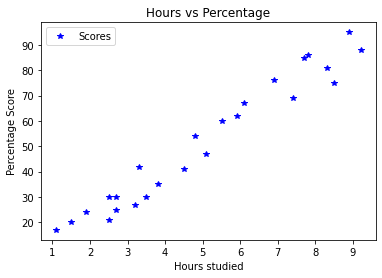

In [58]:
# ploting relationship between score and hours
data.plot(x='Hours',y='Scores',style='*',color='blue')
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.show()

##### => From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

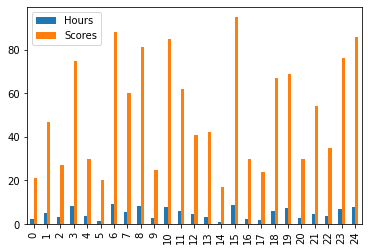

In [59]:
data.plot(kind='bar')
plt.show()

#### ~ Preparing the data

In [60]:
#divide the data into "attributes" (inputs) and "labels" (outputs)
X =  data.iloc[:, :-1].values
y =  data.iloc[:, 1].values

In [61]:
#split this data into training and test sets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

#### ~ Training the Algorithm

In [62]:
LR = LinearRegression()
LR.fit(X_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


##### - Plotting the regression line :

In [63]:
line = LR.coef_*X+LR.intercept_

##### - Plotting for the test data :

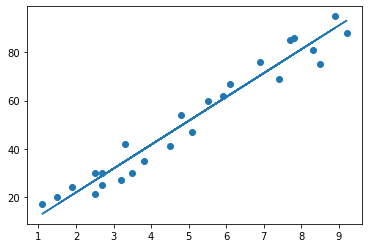

In [64]:
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Testing data - In Hours
### ~ Making Predictions

##### - Testing data - In Hours

In [65]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


##### - Predicting the scores

In [66]:
y_pred = LR.predict(X_test)
print("The predicte Y is", y_pred)

The predicte Y is [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


##### - Comparing Actual vs Predicted

In [67]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


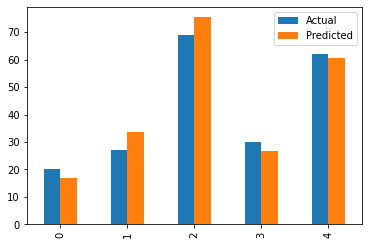

In [68]:
df.plot(kind='bar')
plt.show()

In [69]:
score = LR.score(X_test, y_test)
print("Prediction Score is:-", score)

Prediction Score is:- 0.9454906892105356


##### - Check For The Case Given In Task

what will be predicted score if a student studies for .75hrs/day ?

In [71]:
Hour = [[9.75]]
score = LR.predict(Hour)
print("Prediction :",score)

Prediction : [98.64706073]
